**Importing the Libraries**

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**LOADING DATASET**

In [35]:
data = pd.read_csv('/content/creditcard.csv')

In [36]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**DATA PREPROCESSING**

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**MISSING VALUES IN EACH COLUMN**

In [38]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Filling Null Values**
```



In [39]:
data = data.dropna(how = 'any')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [40]:
data.isnull().sum().max()

0

In [41]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Visualization')

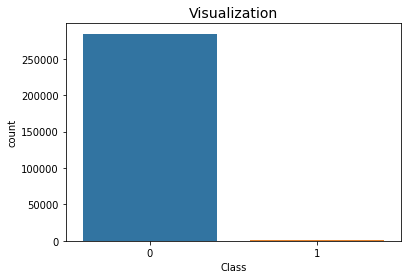

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot('Class', data=data)
plt.title('Visualization', fontsize=14)

HANDLING HIGHLY IMBALANCED DATA

In [43]:
legit = data[data.Class== 0]
fraud = data[data.Class== 1]

In [44]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [45]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [46]:

fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

**Comparing the values of both transactions**

In [47]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


**Under-Sampling**

Picking random 492 transcations from normal transactions because fraud transactions are 492

In [49]:
legit_sample = legit.sample(n=492)

**Combining legit sample data and fraudulent data**

In [50]:
newdata = pd.concat([legit_sample, fraud], axis=0)

In [51]:
newdata.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
278649,168337.0,1.294806,-2.113612,0.464546,0.519262,-1.968472,0.717086,-1.255496,0.318894,2.568888,...,0.260059,0.590839,0.015154,1.237340,-0.676111,1.272303,-0.063421,0.018854,320.09,0
4012,3649.0,-2.037677,1.559798,0.960552,-0.034881,0.190922,-0.448365,0.329370,-1.214526,1.652499,...,0.331829,-1.079864,0.332750,-0.200414,-0.060831,0.003059,-0.512867,0.270912,8.90,0
277041,167427.0,1.957769,-1.066796,-0.967330,-0.702640,-0.924669,-0.420337,-1.008440,-0.020246,-0.140572,...,0.485107,1.328560,-0.087961,-0.361282,-0.090810,0.028221,0.017408,-0.016879,98.95,0
244039,152180.0,2.058578,-0.313371,-2.788443,-0.776065,2.498258,3.164045,-0.398023,0.715482,0.448258,...,0.242974,0.744561,0.038839,0.737468,0.303356,-0.087740,-0.000934,-0.065147,2.69,0
30418,35914.0,1.067379,0.040536,0.784279,1.213379,-0.413509,0.129499,-0.212233,0.194080,0.226039,...,-0.169353,-0.344521,0.072326,0.201014,0.359274,-0.546243,0.050185,0.018707,20.57,0


In [52]:
newdata['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


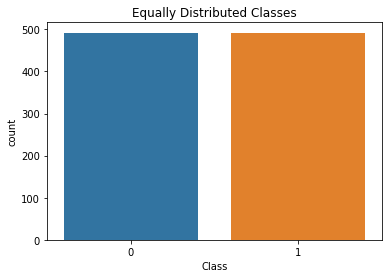

In [54]:
sns.countplot('Class', data=newdata)
plt.title('Equally Distributed Classes')
plt.show()

In [55]:
newdata.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96683.526423,0.107976,-0.060602,0.059779,0.014168,-0.032189,-0.035031,0.046973,-0.006241,-0.068051,...,-0.015224,0.005195,-0.001433,-0.013370,-0.022869,-0.000449,-0.013482,0.010481,0.006081,90.637073
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


**SPLITTING DATA**

In [56]:
X = newdata.drop(columns='Class', axis=1)
Y = newdata['Class']

In [57]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
278649,168337.0,1.294806,-2.113612,0.464546,0.519262,-1.968472,0.717086,-1.255496,0.318894,2.568888,...,0.477096,0.260059,0.590839,0.015154,1.237340,-0.676111,1.272303,-0.063421,0.018854,320.09
4012,3649.0,-2.037677,1.559798,0.960552,-0.034881,0.190922,-0.448365,0.329370,-1.214526,1.652499,...,-0.359192,0.331829,-1.079864,0.332750,-0.200414,-0.060831,0.003059,-0.512867,0.270912,8.90
277041,167427.0,1.957769,-1.066796,-0.967330,-0.702640,-0.924669,-0.420337,-1.008440,-0.020246,-0.140572,...,0.245732,0.485107,1.328560,-0.087961,-0.361282,-0.090810,0.028221,0.017408,-0.016879,98.95
244039,152180.0,2.058578,-0.313371,-2.788443,-0.776065,2.498258,3.164045,-0.398023,0.715482,0.448258,...,-0.168001,0.242974,0.744561,0.038839,0.737468,0.303356,-0.087740,-0.000934,-0.065147,2.69
30418,35914.0,1.067379,0.040536,0.784279,1.213379,-0.413509,0.129499,-0.212233,0.194080,0.226039,...,-0.157391,-0.169353,-0.344521,0.072326,0.201014,0.359274,-0.546243,0.050185,0.018707,20.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [58]:
Y

278649    0
4012      0
277041    0
244039    0
30418     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

**TRAINING AND TESTING DATA**

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, stratify = Y, random_state=2)

In [64]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(984, 30)
(738, 30)
(246, 30)


**LOGISTIC REGRESSION**

In [65]:
model = LogisticRegression()

In [66]:
model.fit(X_train,Y_train)

LogisticRegression()

**ACCURACY SCORE**

In [67]:
predict = model.predict(X_train)

In [68]:
accuracy = accuracy_score(predict, Y_train)

In [69]:
print("The accuracy score is: ", accuracy)

The accuracy score is:  0.9498644986449865


**Accuracy score on test data**

In [70]:
predict2 = model.predict(X_test)
testaccuracy = accuracy_score(predict2, Y_test)

In [72]:
print("The accuracy score is: ", testaccuracy)

The accuracy score is:  0.926829268292683
